In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

#### Data interpretation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# No null values in the data

In [8]:
num_feature = [feature for feature in df.columns if df[feature].dtypes not in ['O', 'object'] ]

print("No of Numerical Variable ", len(num_feature))

df[num_feature].head()

No of Numerical Variable  16


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


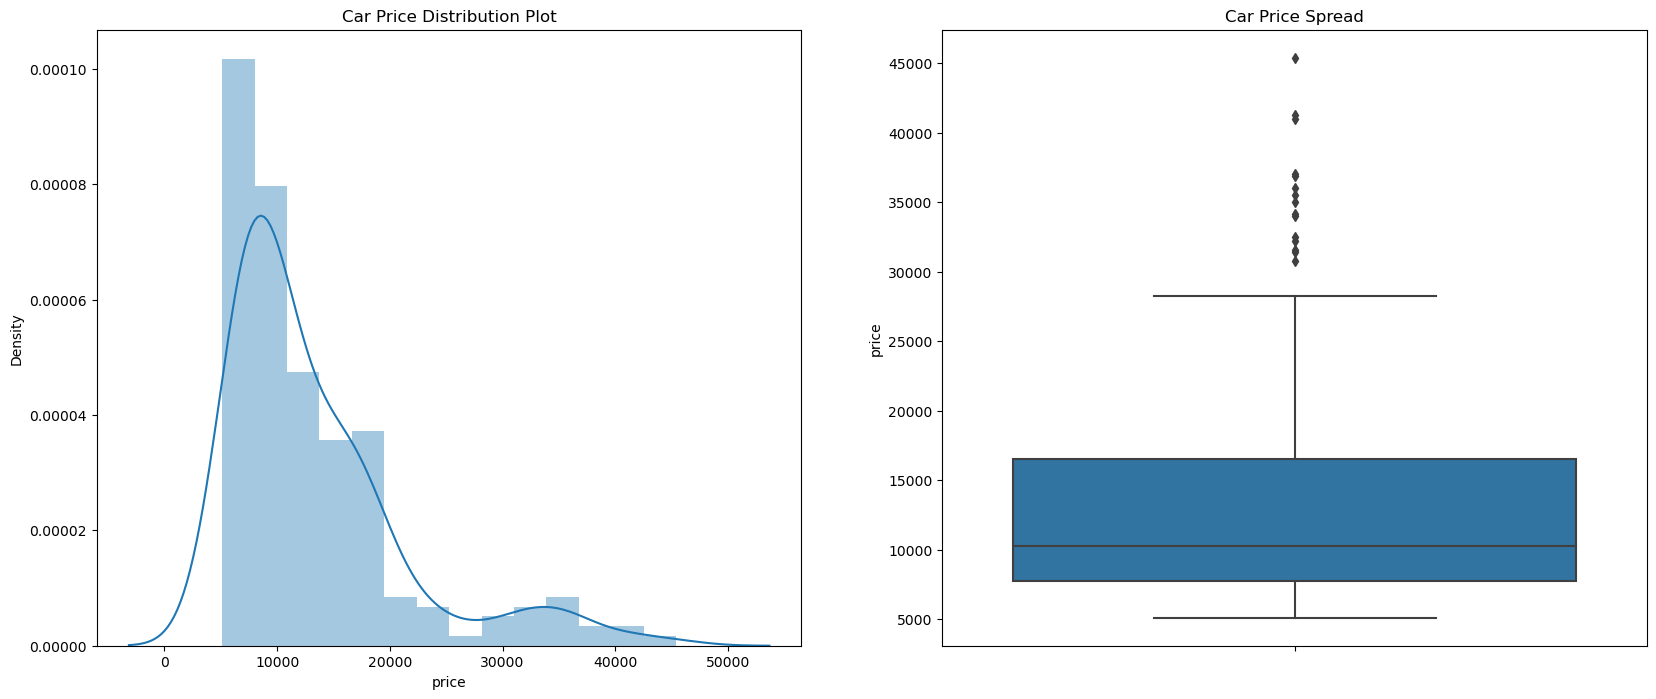

In [9]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df["price"])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df["price"])

plt.show()

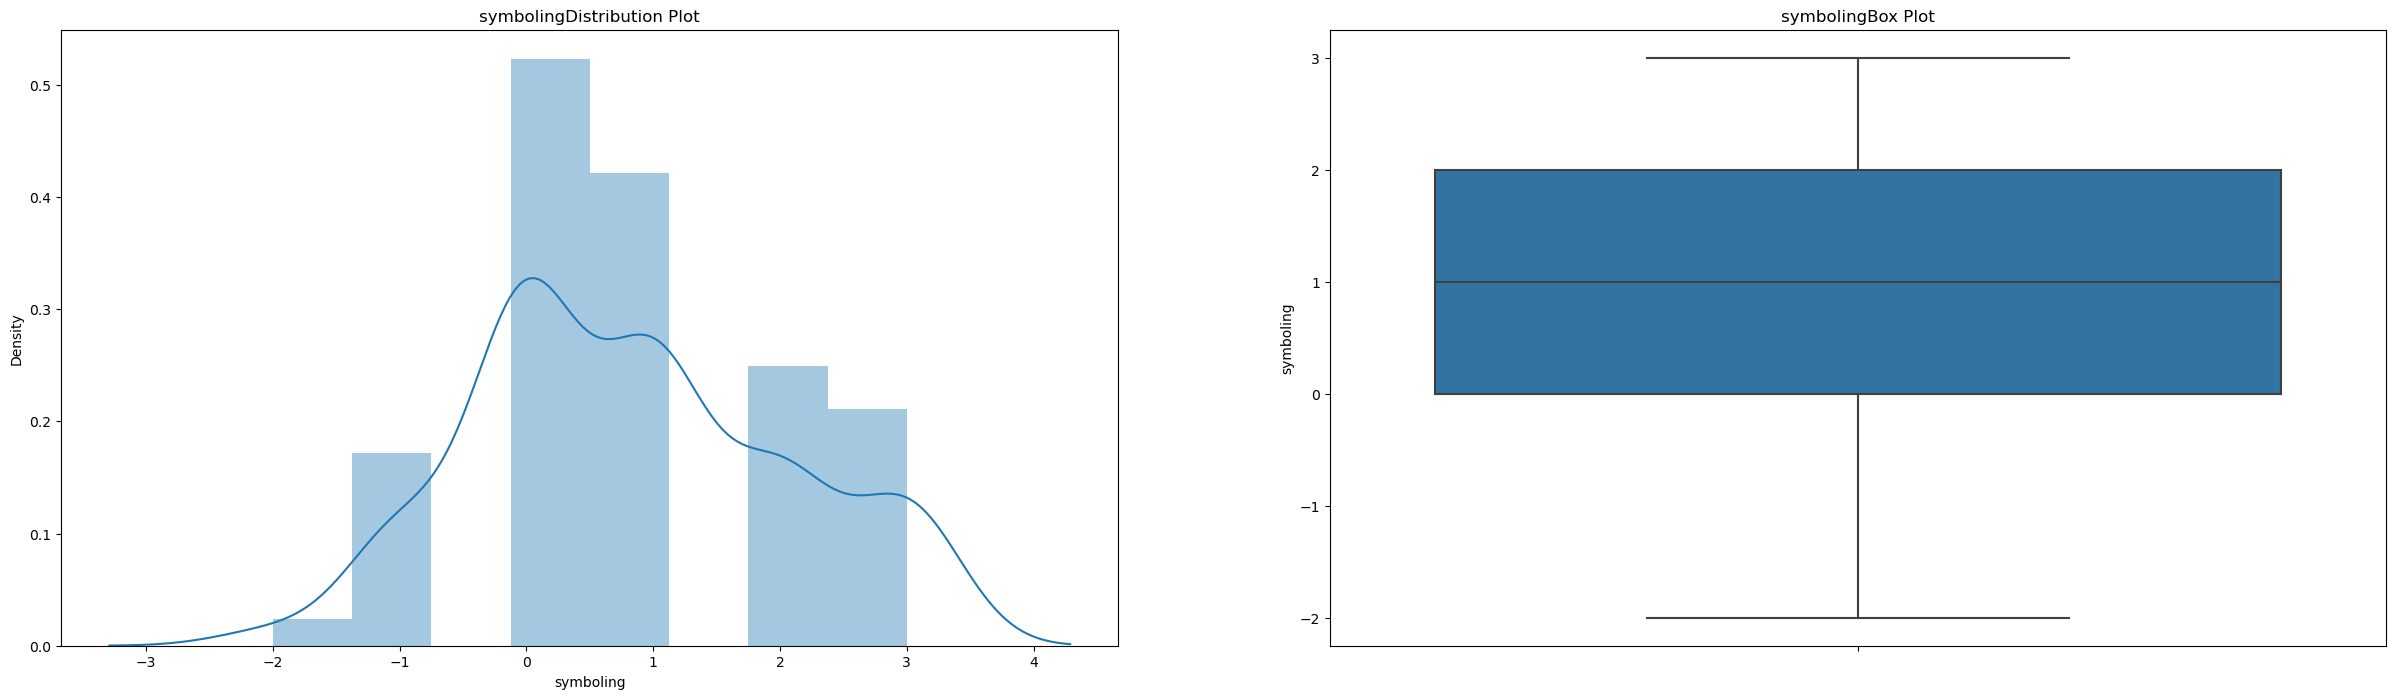

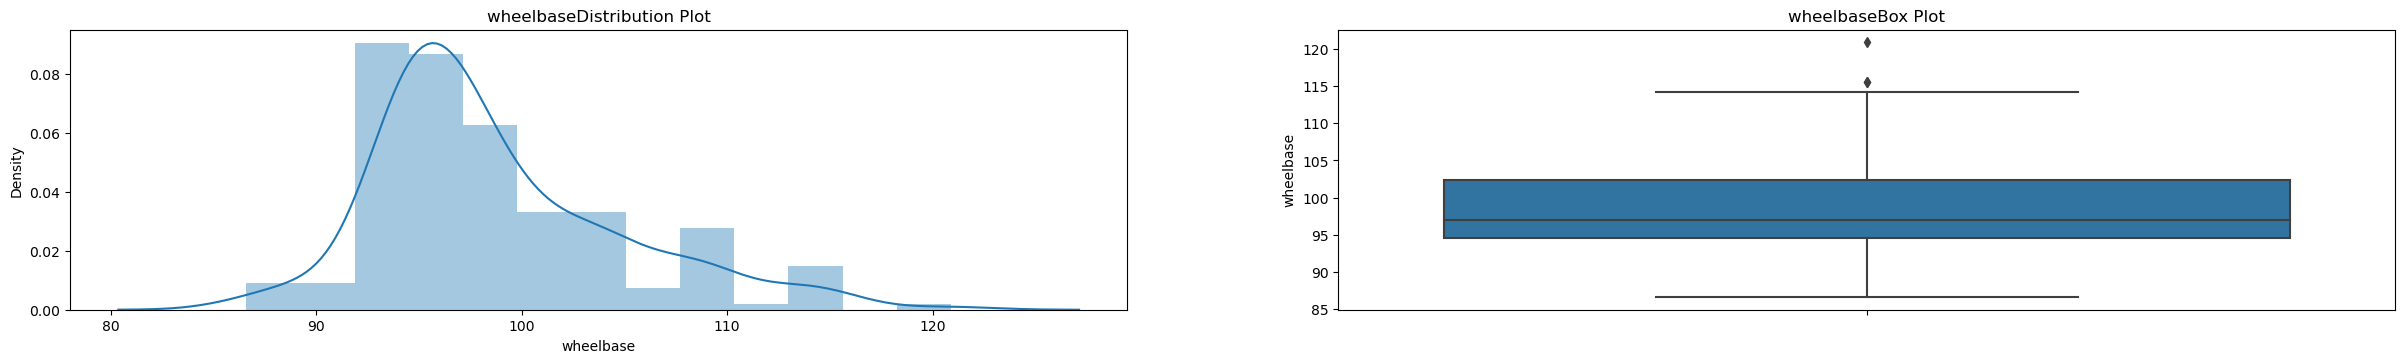

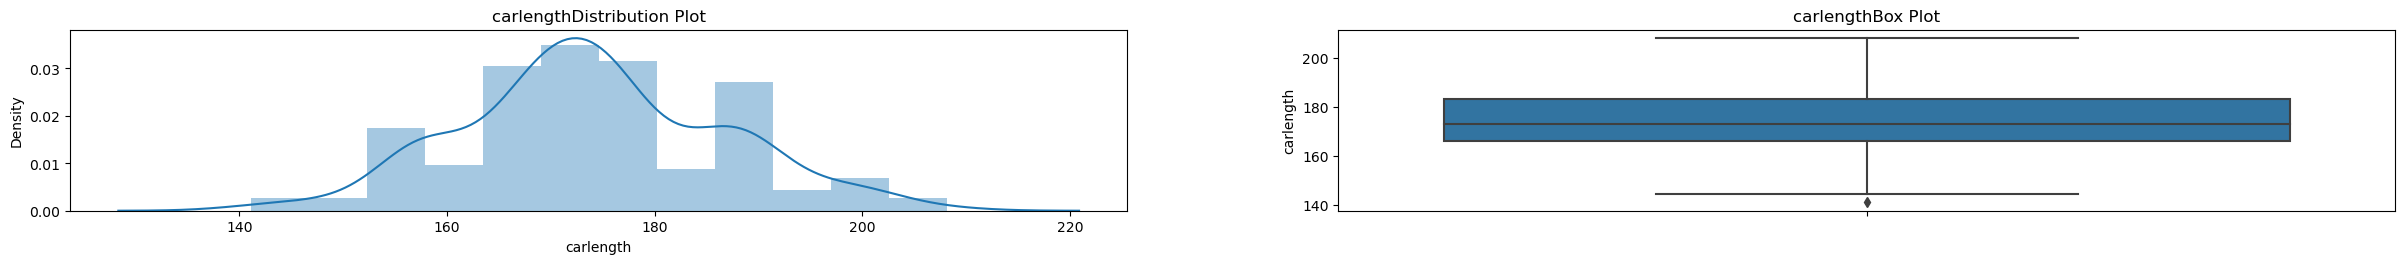

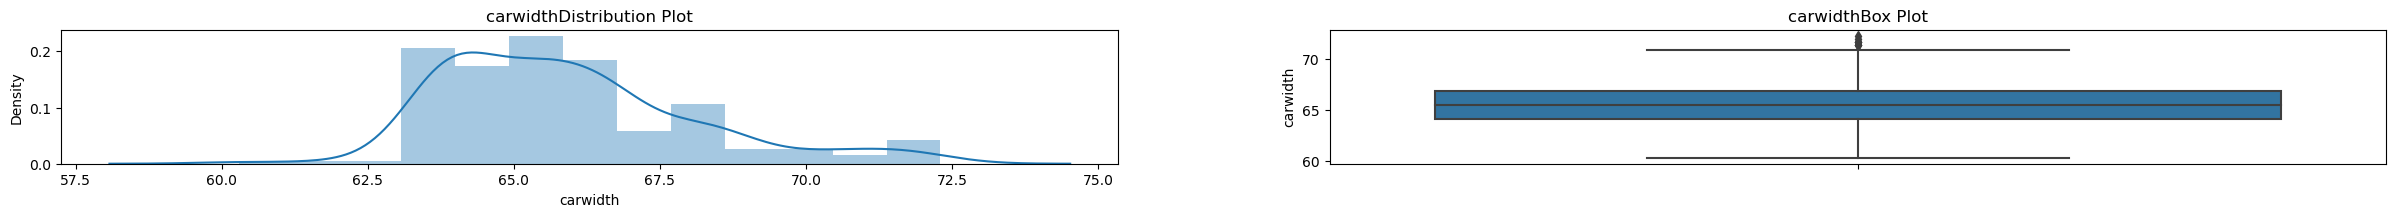

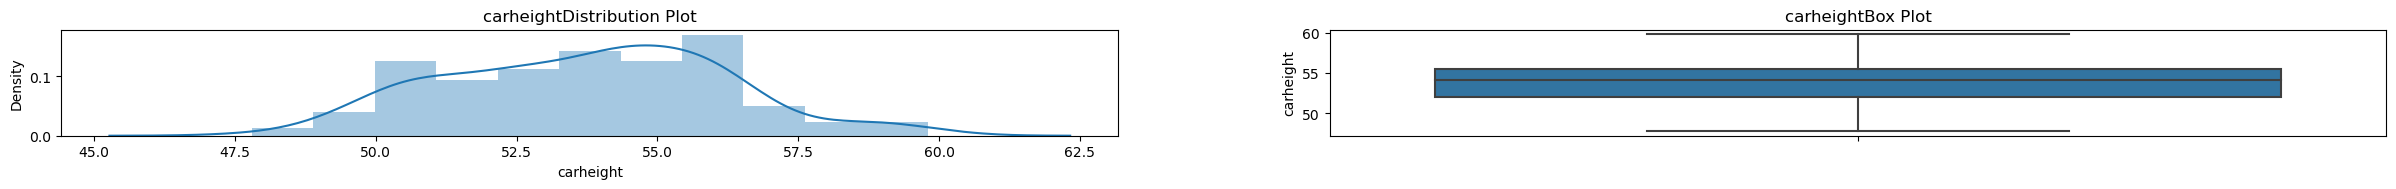

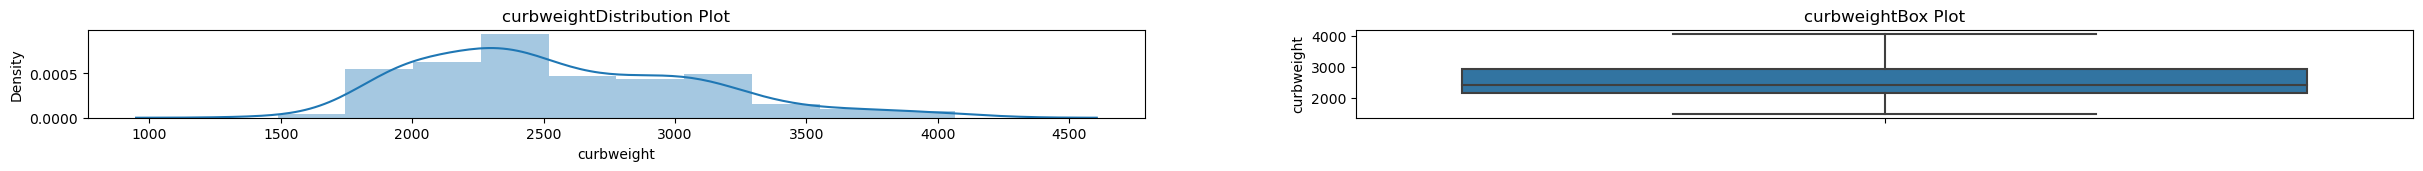

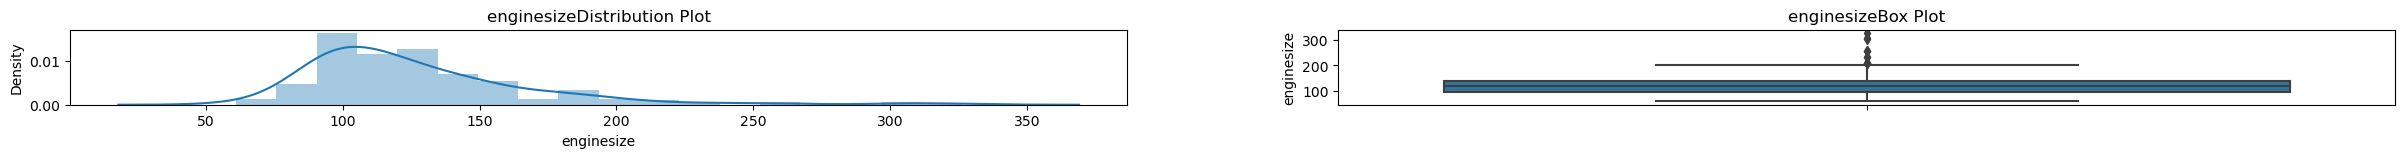

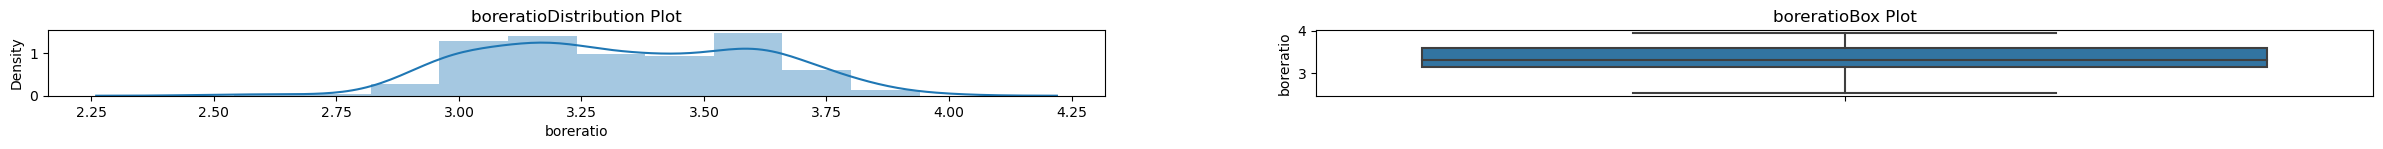

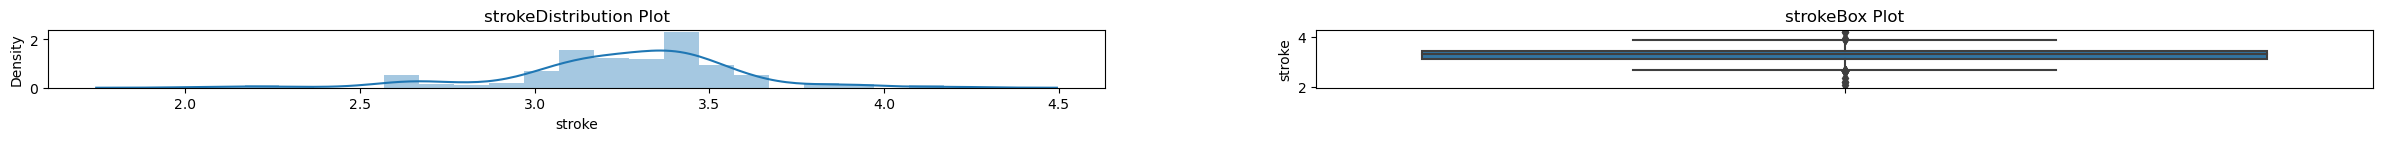

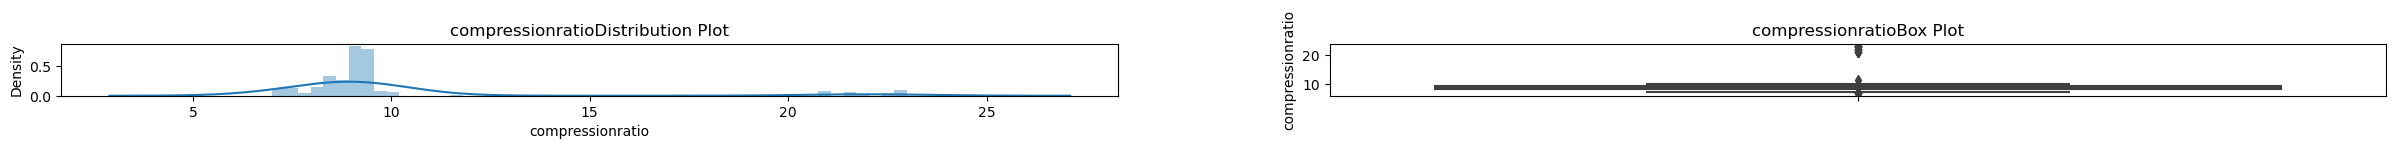

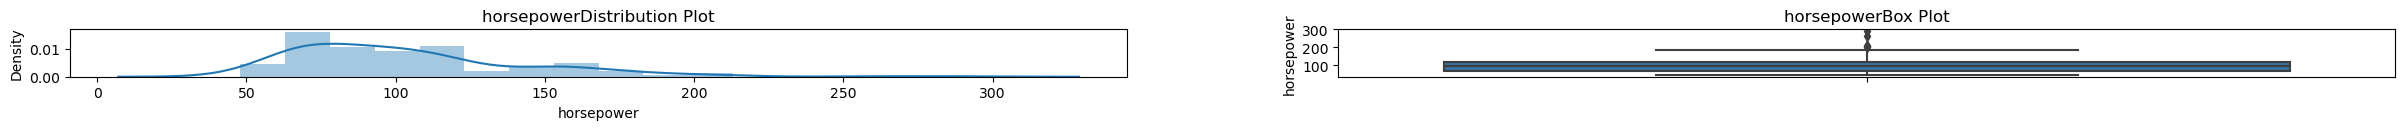

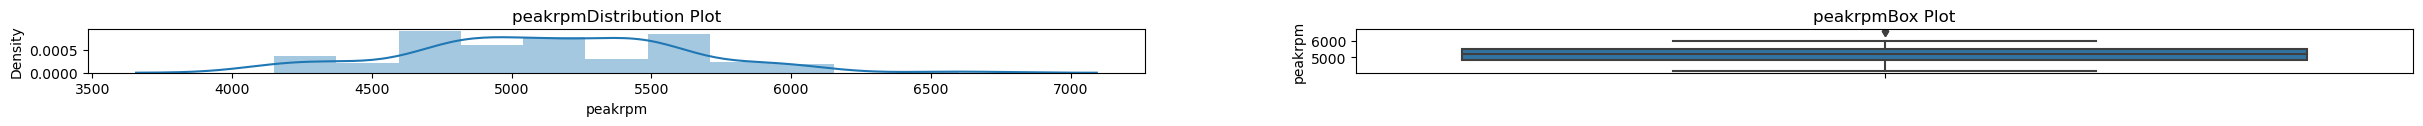

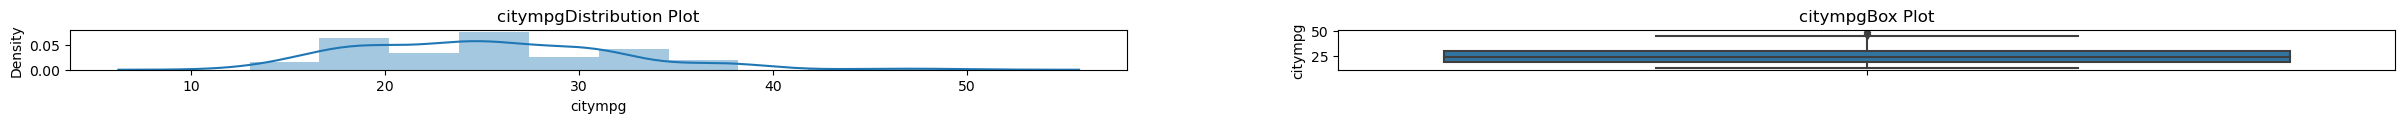

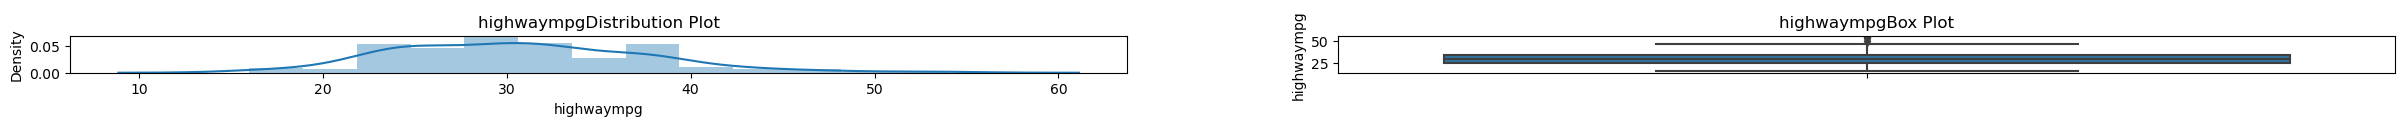

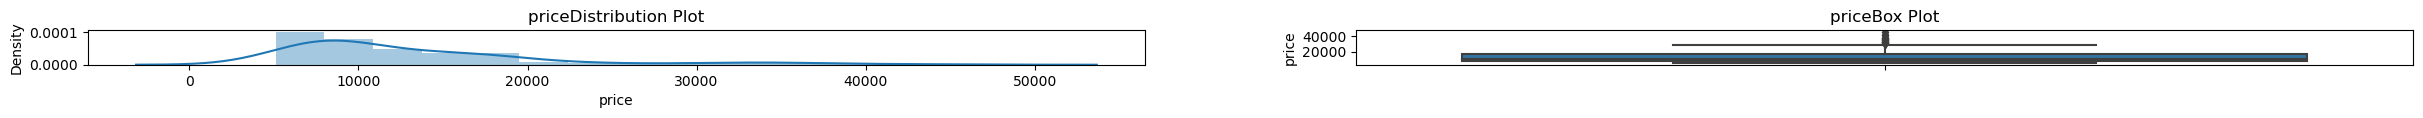

In [10]:
index = 1
for feature in num_feature:
    if feature not in ["car_ID"]:
        plt.figure(figsize=(30,8))
        # first plot 
        plt.subplot(index,2,1)
        plt.title(feature + 'Distribution Plot')
        sns.distplot(df[feature])
        # second plot
        plt.subplot(index,2,2)
        plt.title(feature + 'Box Plot')
        sns.boxplot(y=df[feature])

        plt.show()
        index = index + 1
        

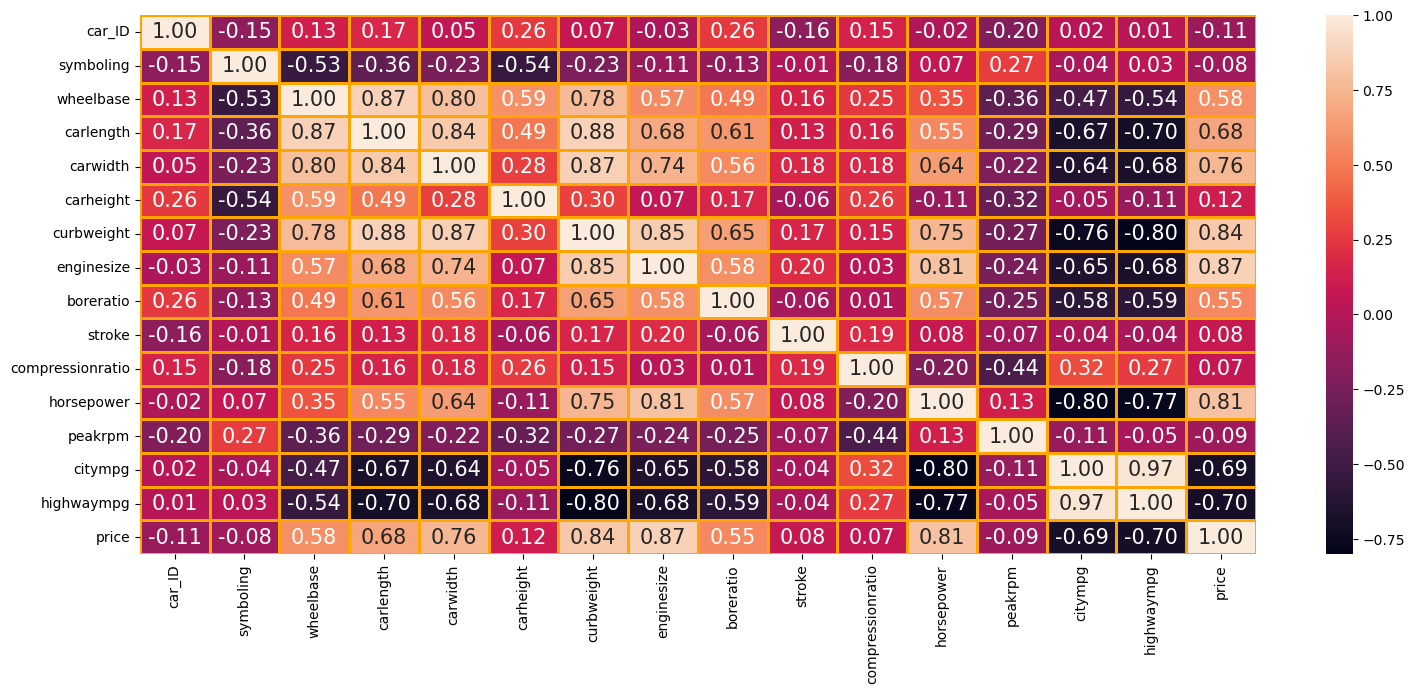

In [11]:
plt.figure(figsize = (18, 7))
sns.heatmap(df[num_feature].corr(), annot = True, 
            fmt = '0.2f', annot_kws = {'size' : 15}, 
            linewidth = 2, linecolor = 'orange')
plt.show()

In [12]:
cat_feature = [feature for feature in df.columns if df[feature].dtypes  in ['O', 'object'] ]

print("Number of Categorical Variable ", len(cat_feature))

df[cat_feature].head()

Number of Categorical Variable  10


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


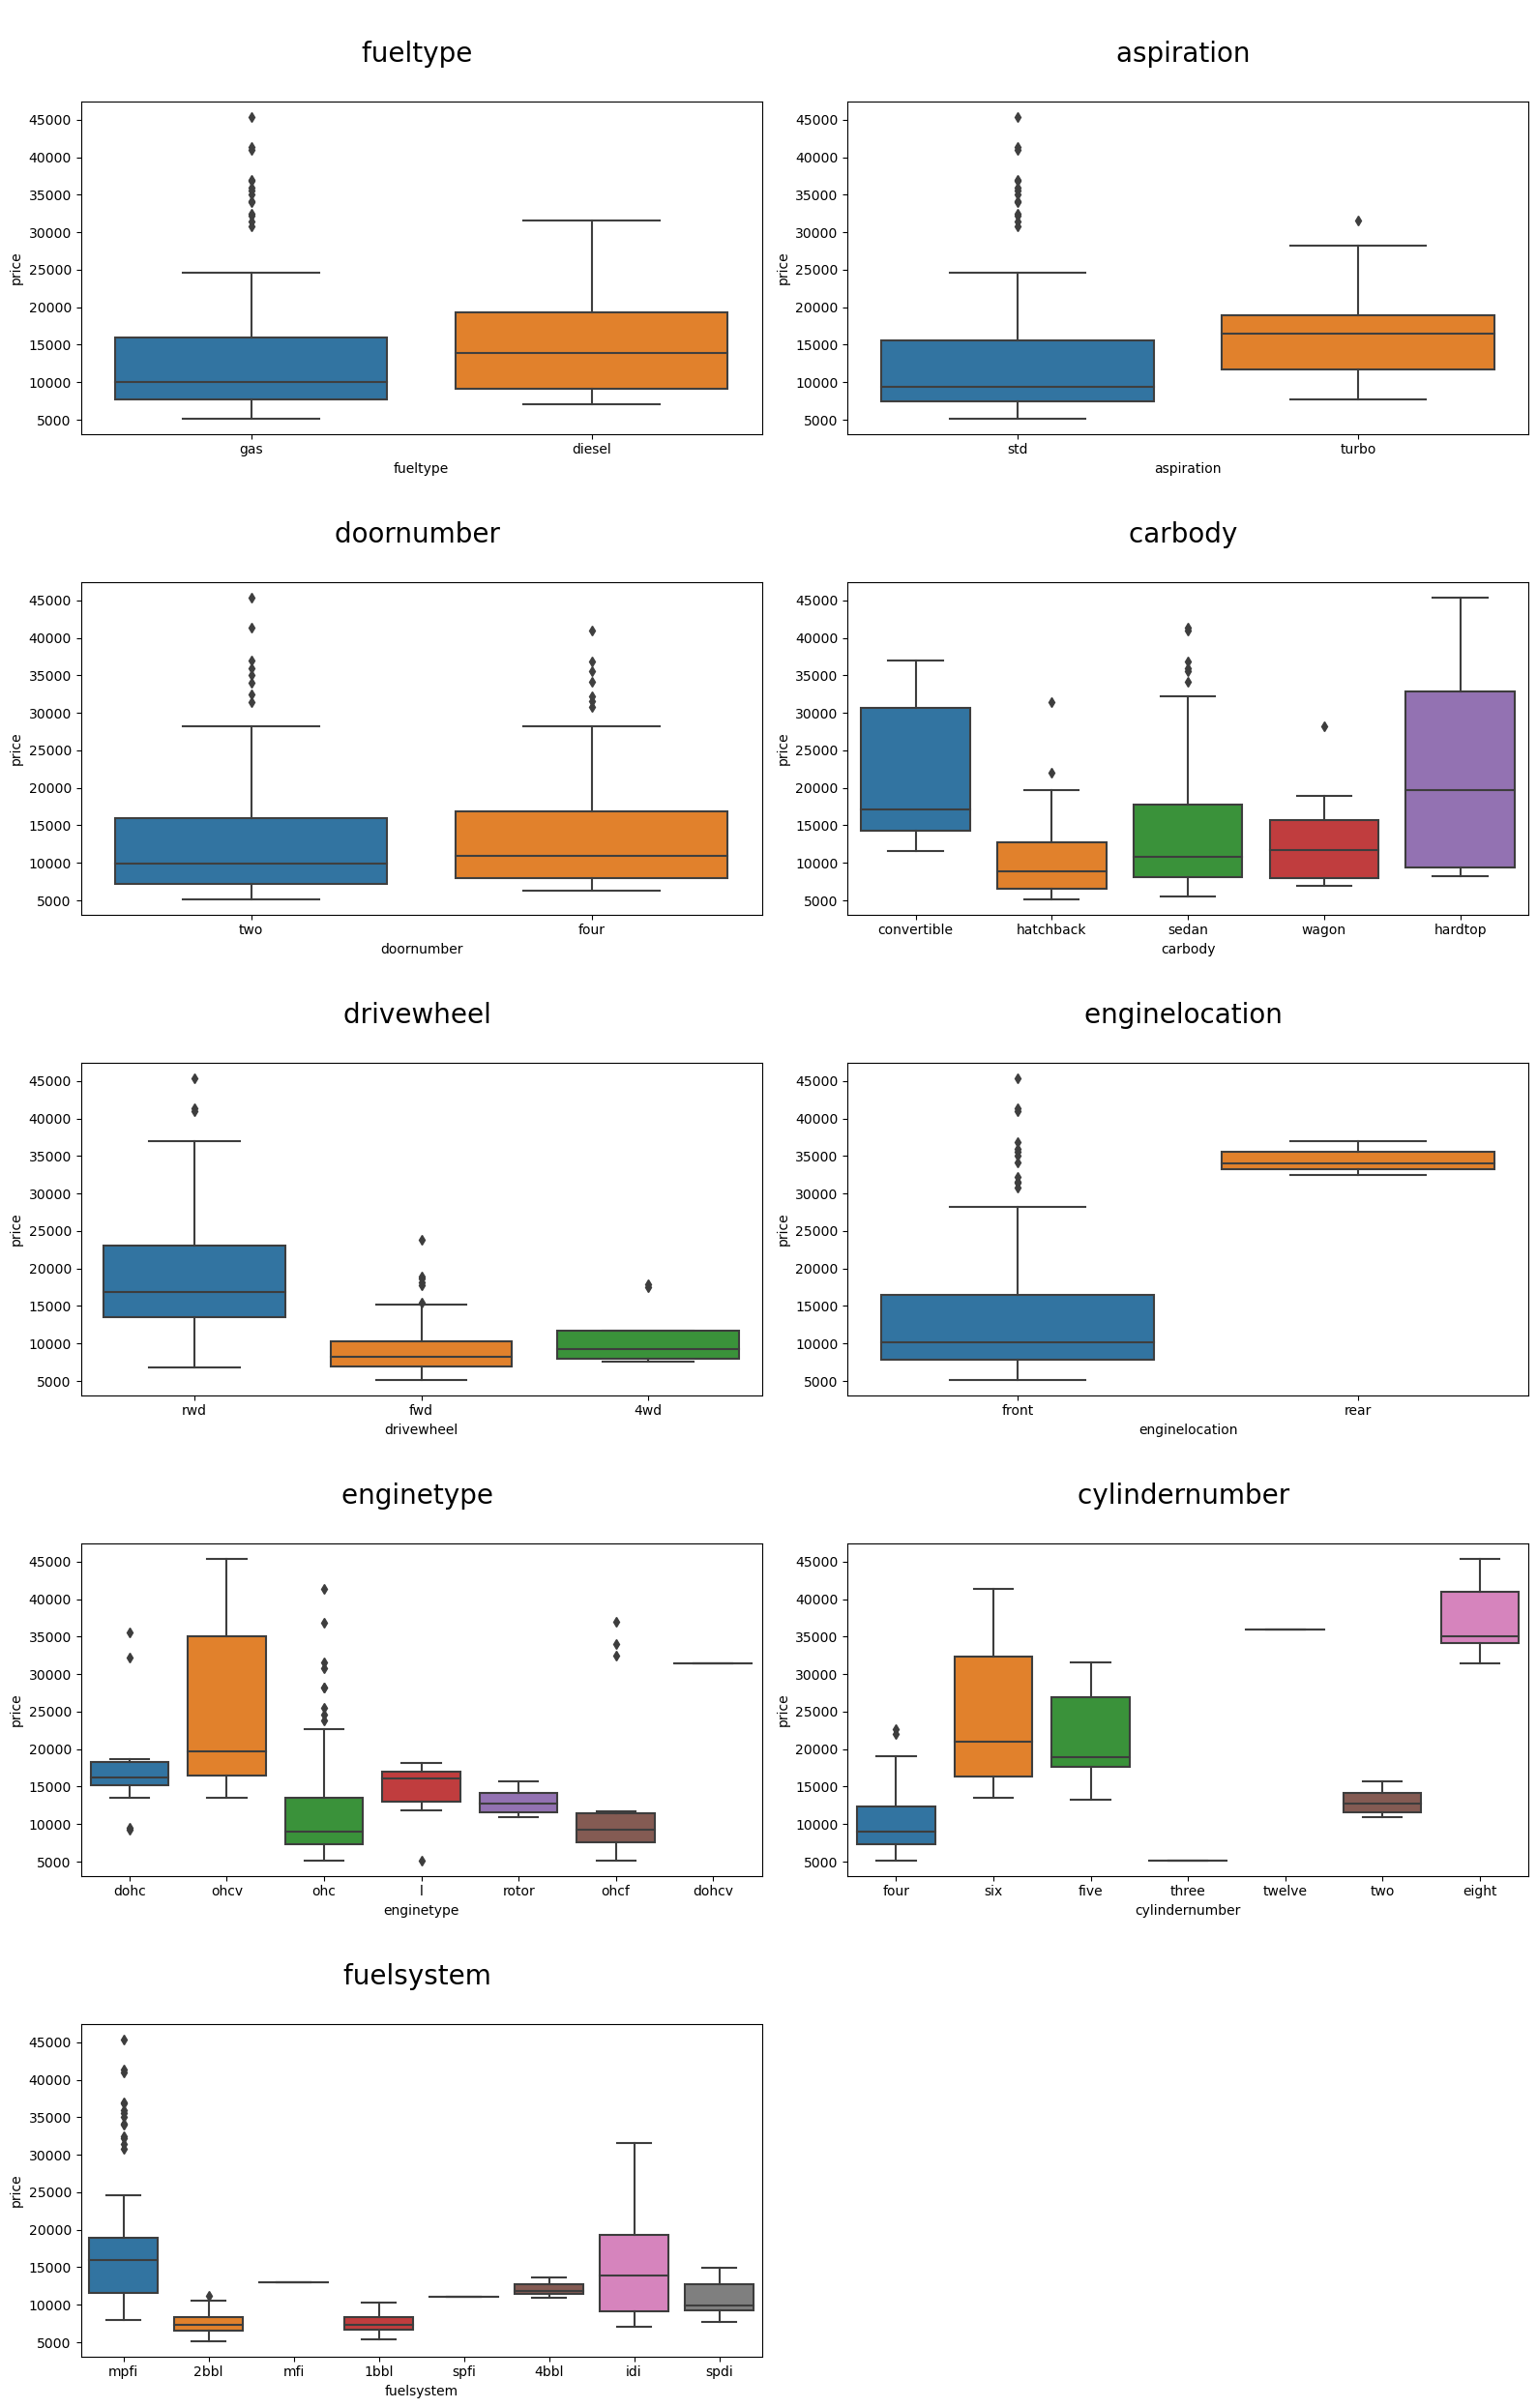

In [13]:
plt.figure(figsize = (16, 25))
plotnumber = 1

for i in range(1, len(cat_feature)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot(x = cat_feature[i] ,y = df['price'], data = df, ax = ax)
        plt.title(f"\n{cat_feature[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

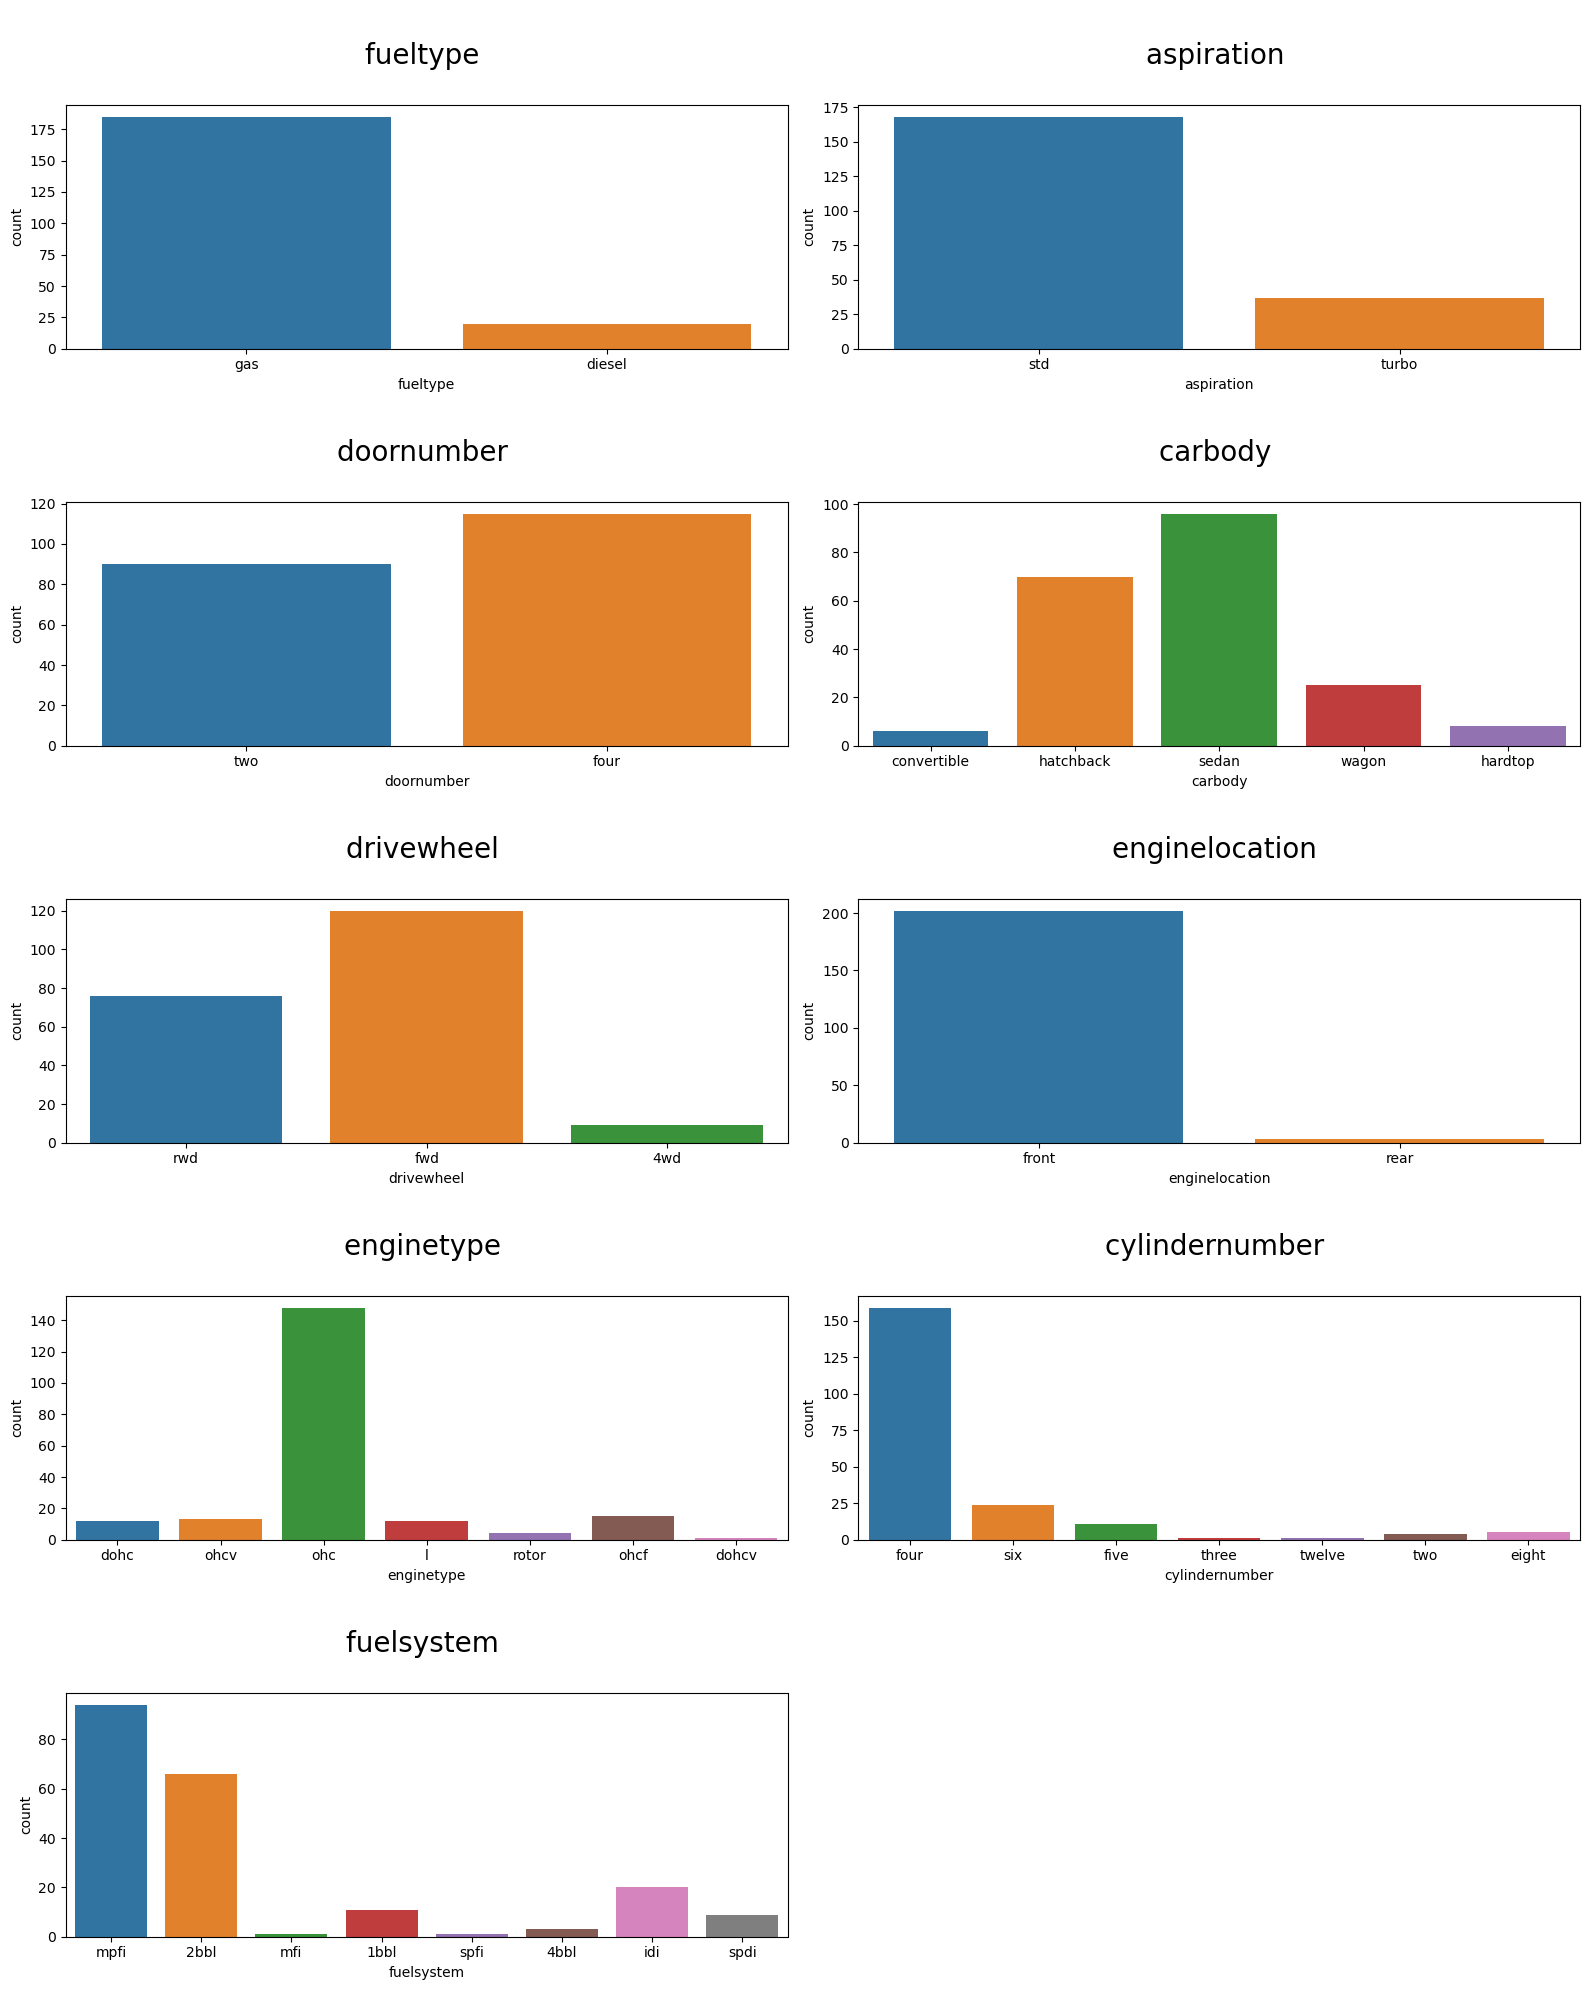

In [14]:
plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cat_feature)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = cat_feature[i], data = df, ax = ax)
        plt.title(f"\n{cat_feature[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [15]:
df["CarName"].count()

205

In [16]:
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [17]:
print(df["CarName"].value_counts())

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64


In [18]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)

In [19]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
df["CompanyName"] = df["CompanyName"].str.lower()

def replace_name(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [21]:
df.loc[df.duplicated()]

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


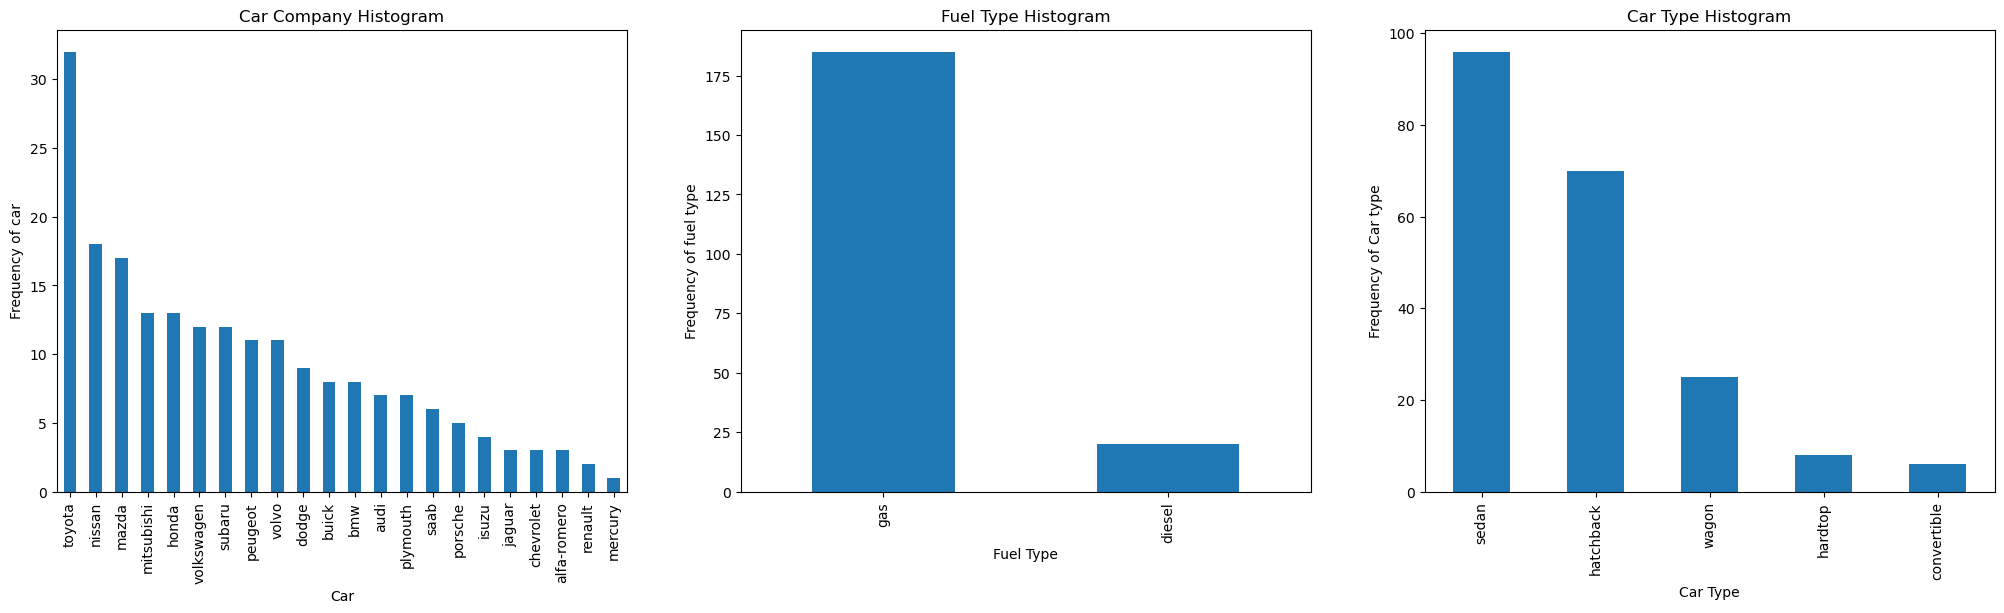

In [22]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df["CompanyName"].value_counts().plot(kind = 'bar')
plt.title('Car Company Histogram')
plt1.set(xlabel = 'Car', ylabel='Frequency of car')

plt.subplot(1,3,2)
plt1 = df["fueltype"].value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df["carbody"].value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

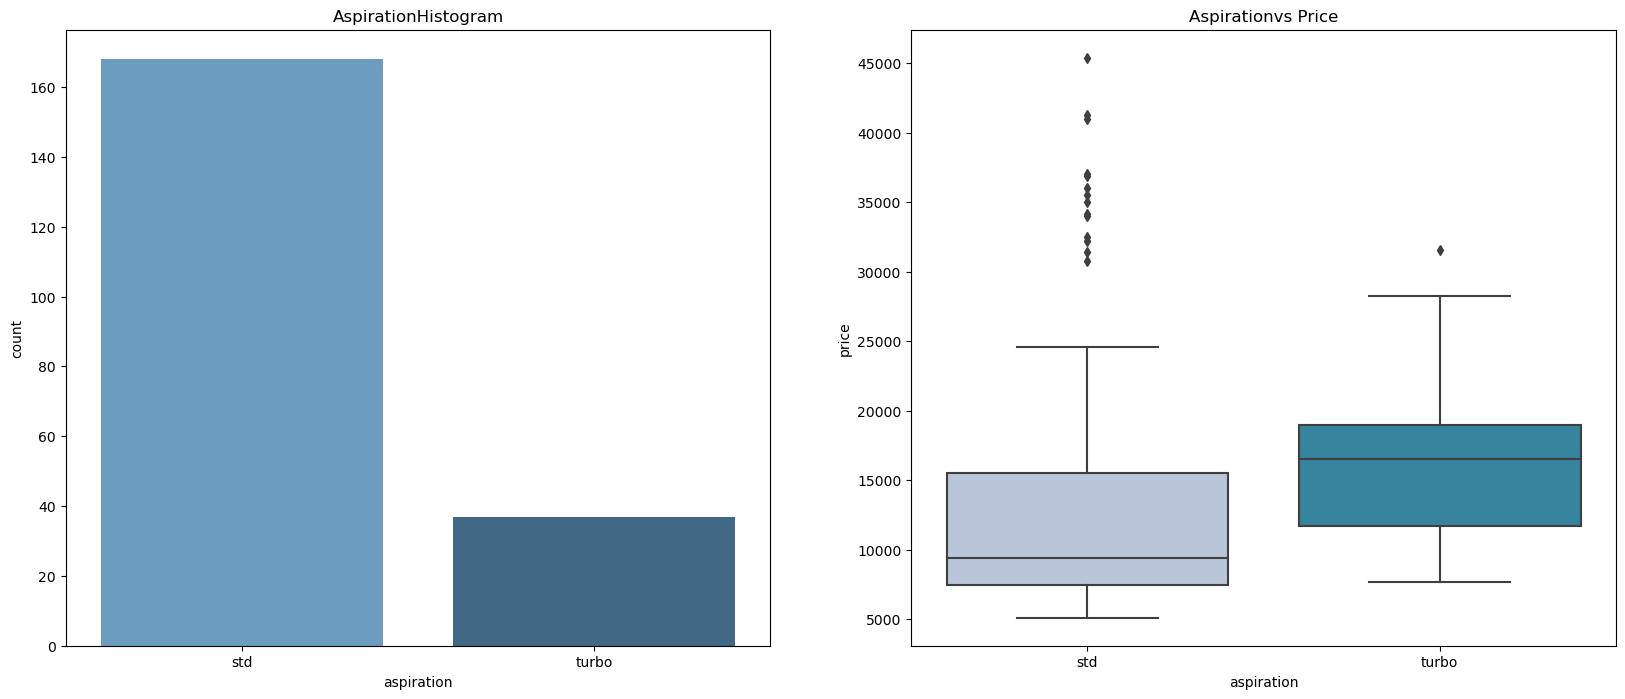

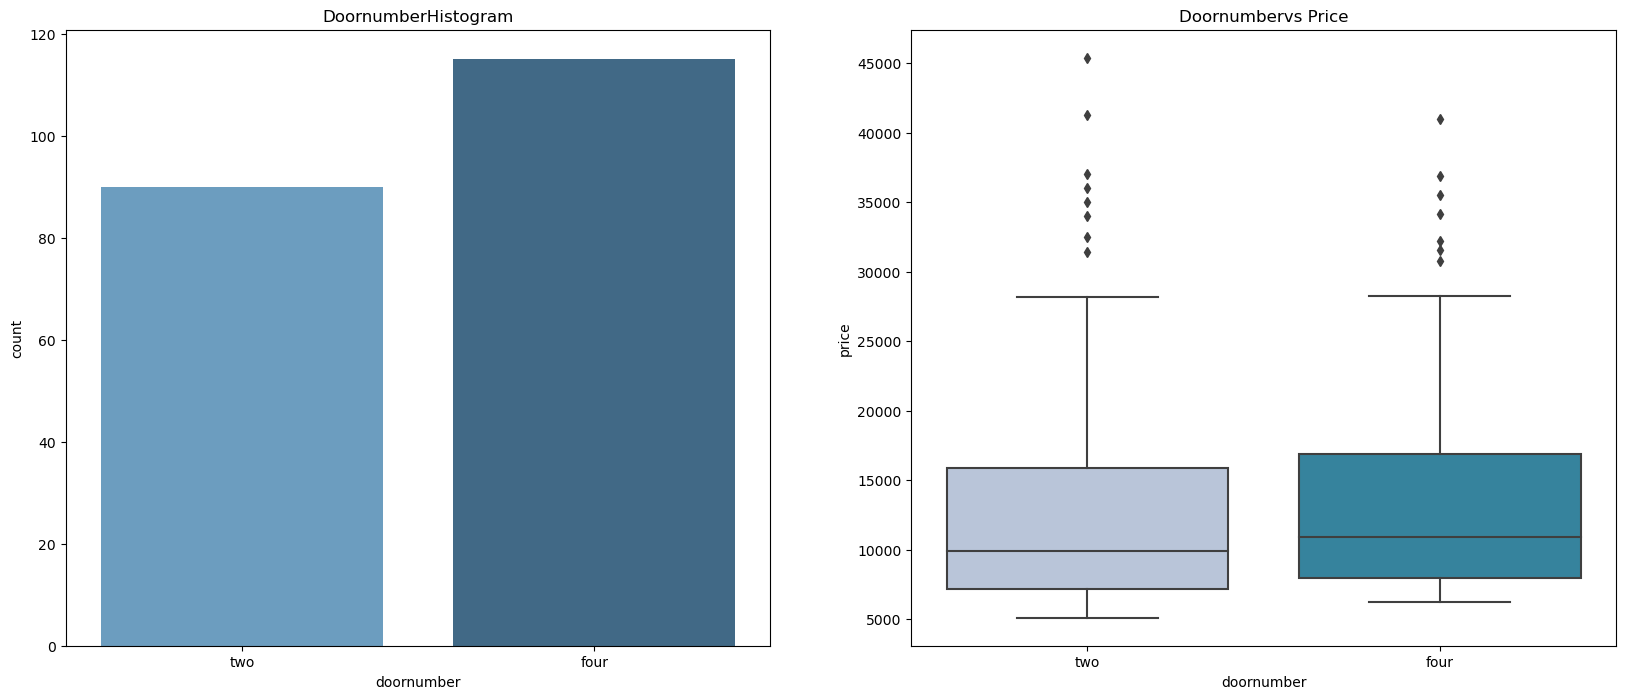

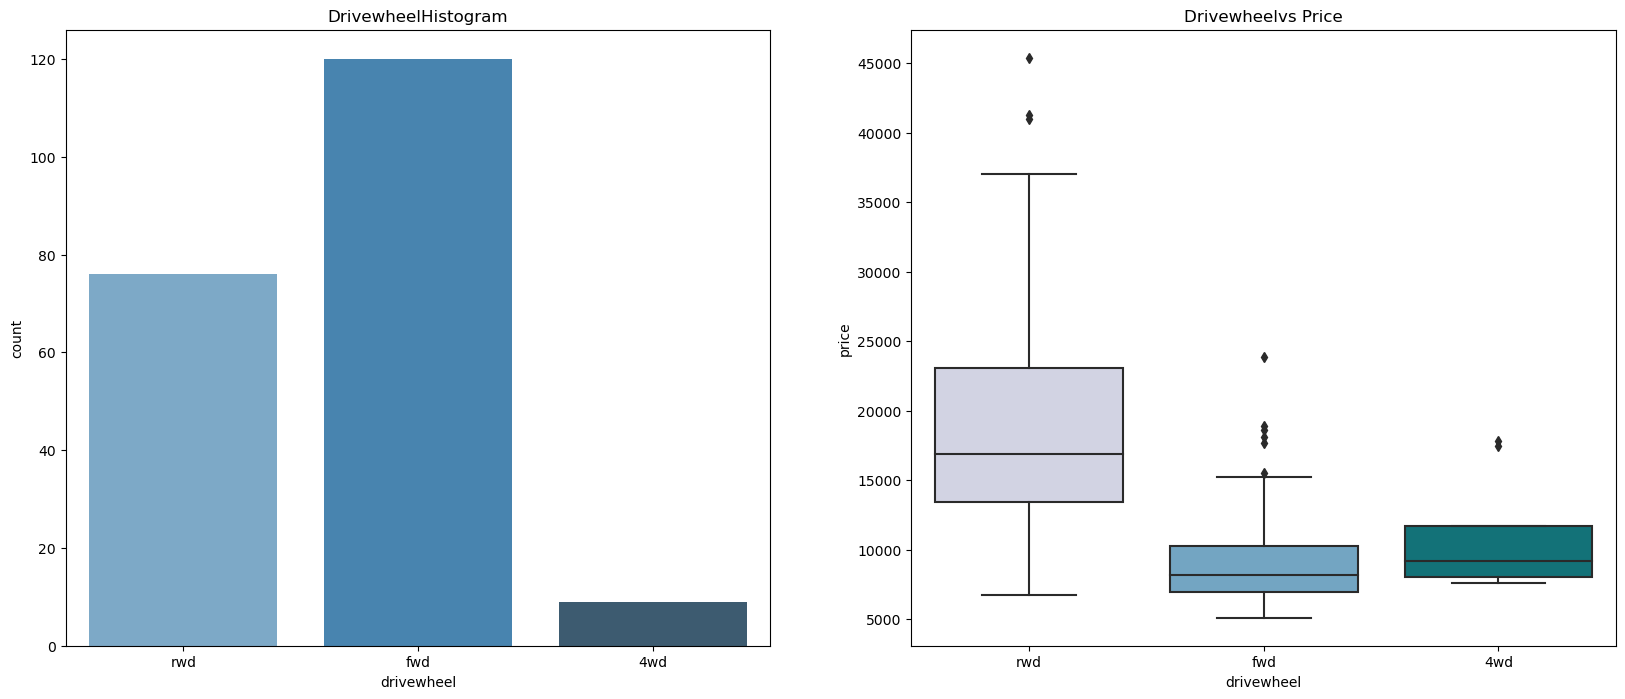

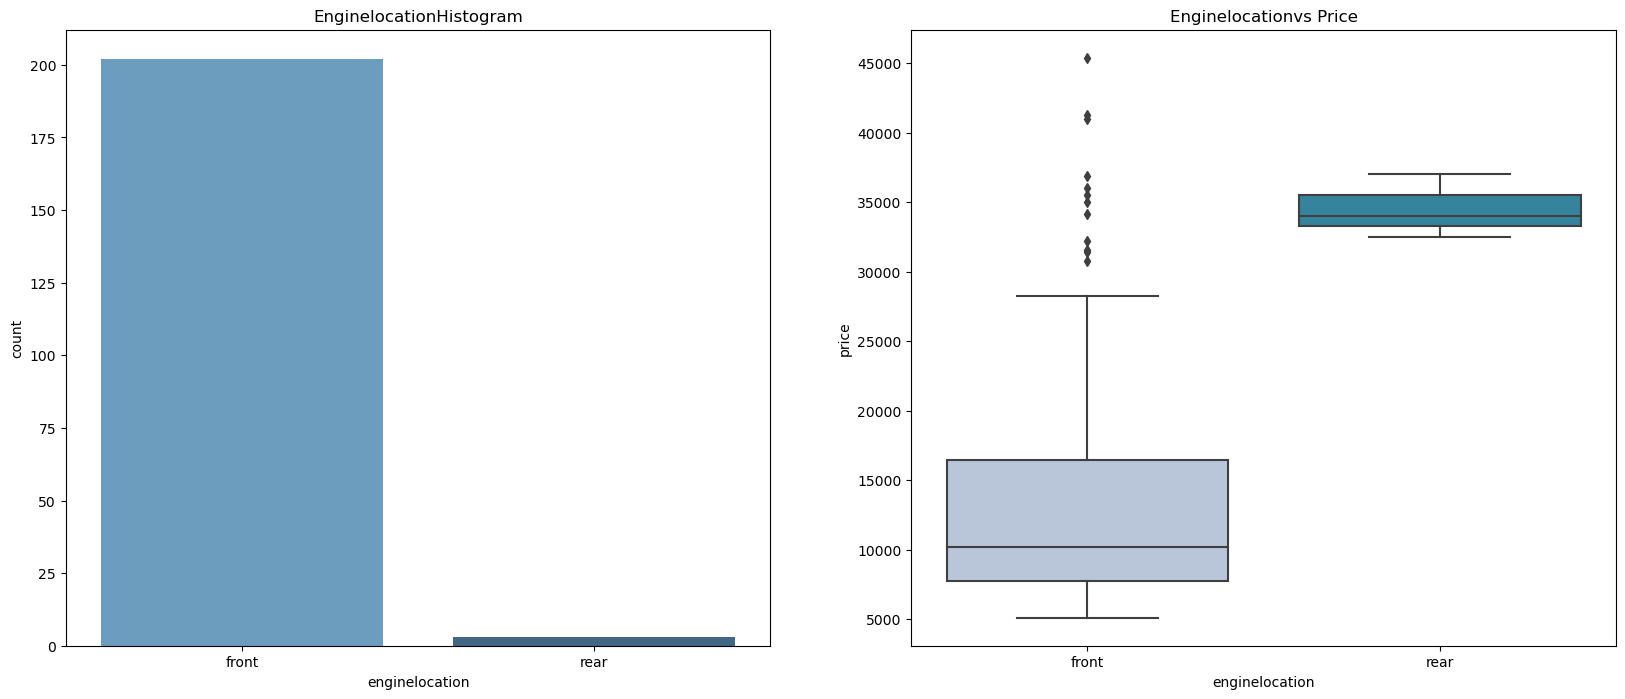

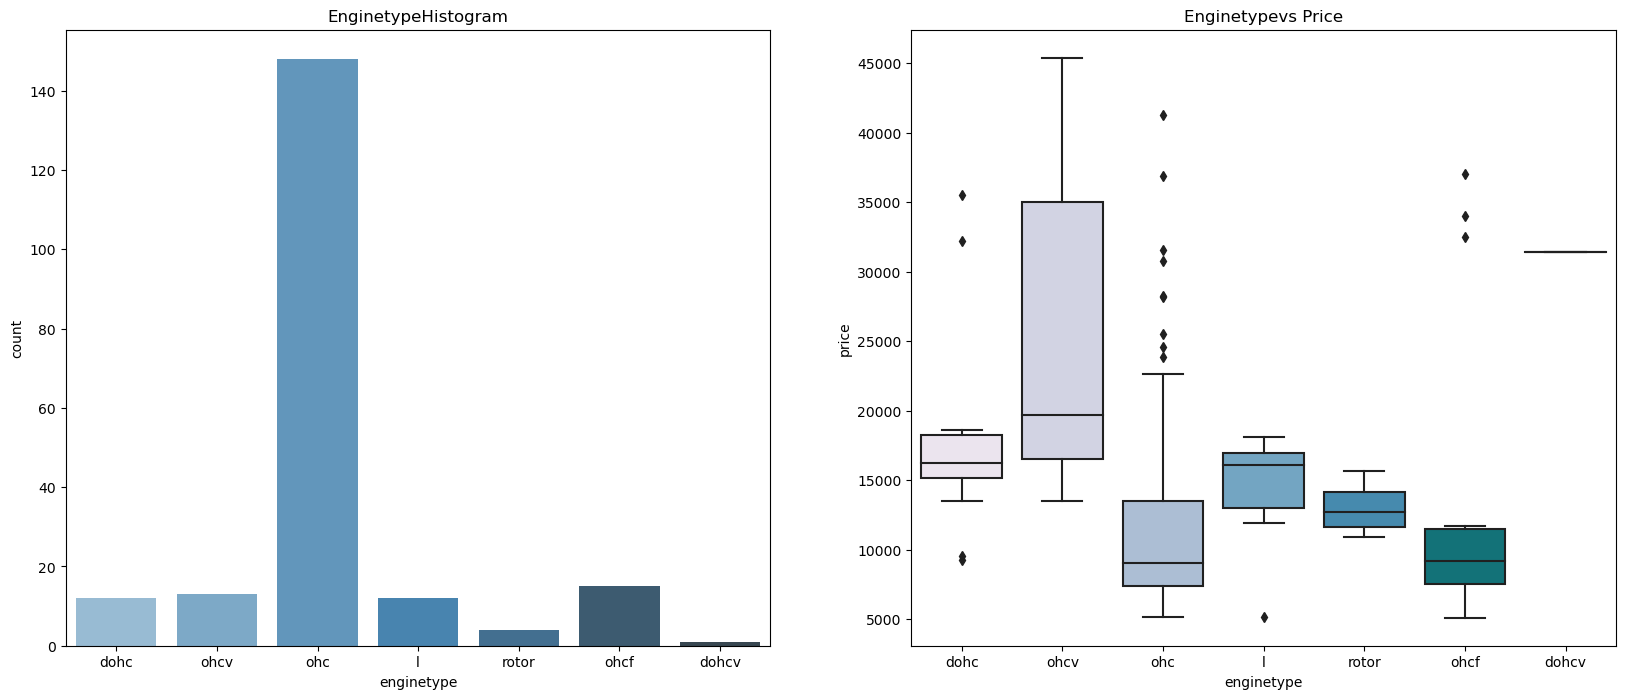

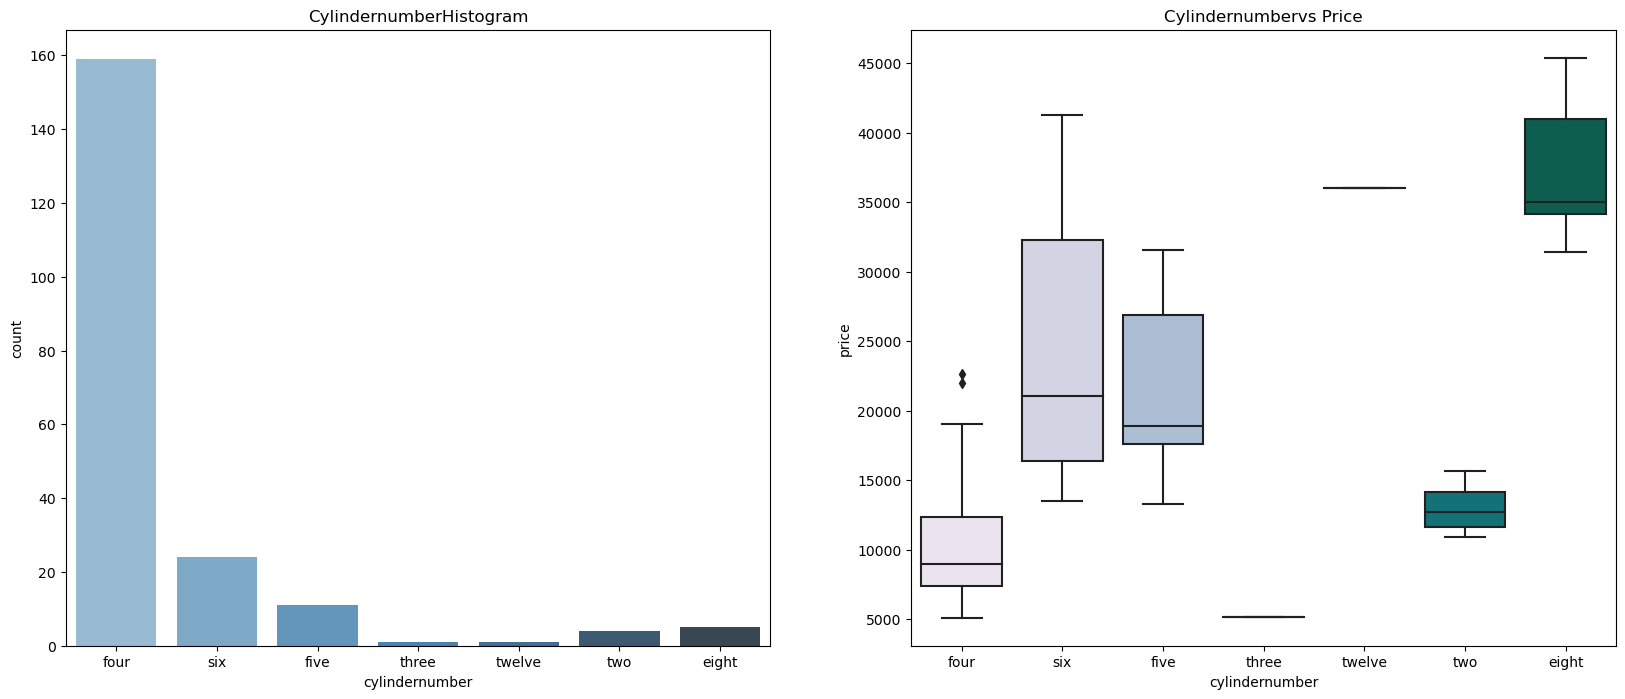

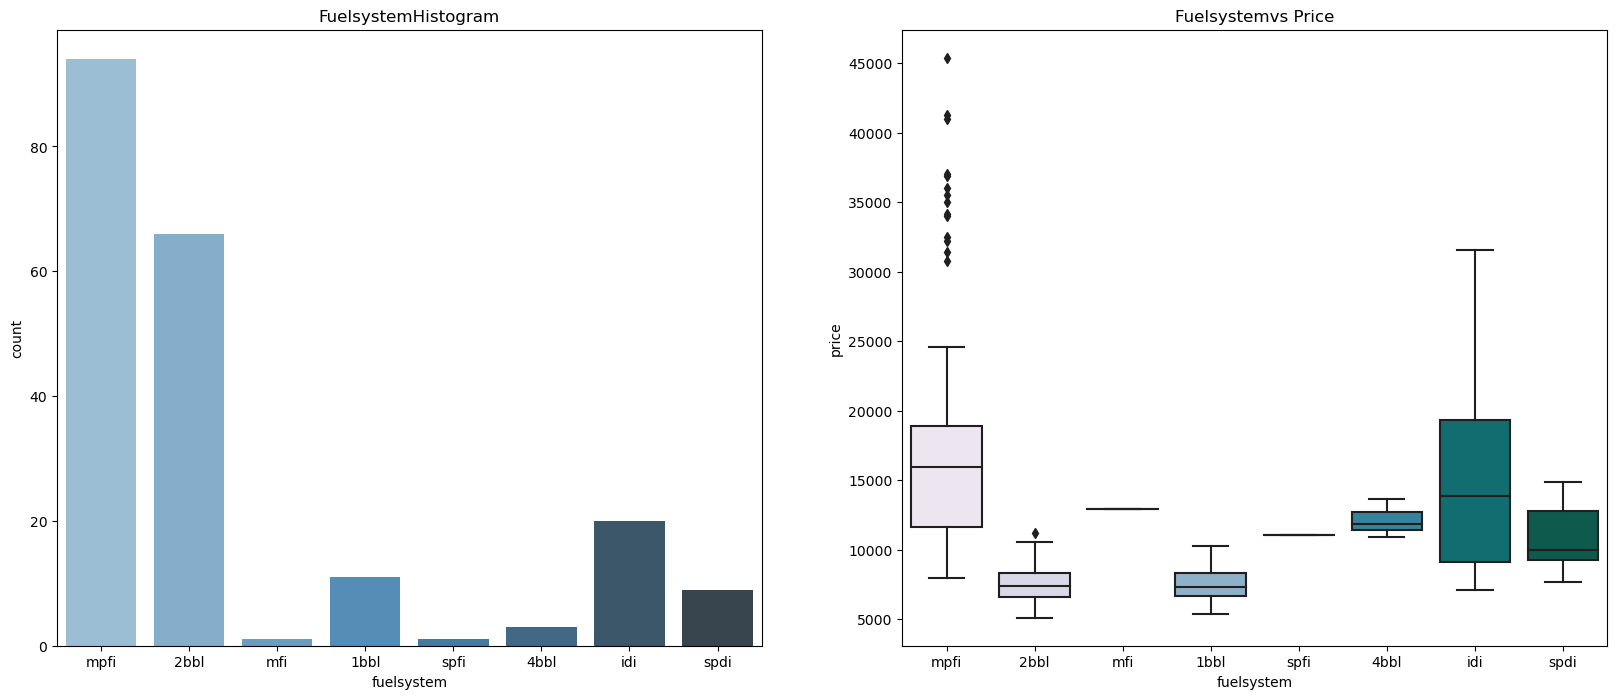

In [23]:
cat_columns = ['aspiration', 'doornumber', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
for feature in cat_columns:
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.title(feature.title() + 'Histogram')
    sns.countplot(df[feature], palette=("Blues_d"))

    plt.subplot(1,2,2)
    plt.title(feature.title() + 'vs Price')
    sns.boxplot(x=df[feature], y=df["price"], palette=("PuBuGn"))

    plt.show()

In [24]:
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
df.drop(columns = ['car_ID'], axis = 1, inplace = True)
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
# encoding ordinal categorical columns
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 
                                                 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [27]:
# creating features and label variable
X = df.drop(columns = 'price', axis = 1)
y = df['price']

In [28]:
# creating features and label variable
X = df.drop(columns = 'price', axis = 1)
y = df['price']

In [29]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [30]:
X.shape

(205, 59)

In [31]:
# checking for multicollinearity using `VIF` and `correlation matrix`

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['Features'] = X.columns

vif

,VIF,Features
0,6.266245e+00,symboling
1,3.728616e+00,doornumber
2,1.883517e+01,wheelbase
3,2.269642e+01,carlength
4,1.465185e+01,carwidth
5,7.304687e+00,carheight
6,4.083151e+01,curbweight
7,2.874438e+01,cylindernumber
8,6.357978e+01,enginesize
9,1.008866e+01,boreratio


In [32]:
X = X.drop(["CompanyName_subaru","enginelocation_rear","enginetype_ohcf"], axis = 1)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the training and testing sets if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
print("Traing Data Shape of x and y respectively:  ", X_train.shape, y_train.shape)
print("Testing Data Shape of x and y respectively:  ", X_test.shape, y_test.shape)

Traing Data Shape of x and y respectively:   (143, 56) (143,)
Testing Data Shape of x and y respectively:   (62, 56) (62,)


In [37]:
from sklearn.linear_model import LinearRegression

# Build the base model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [38]:
y_pred = lr_model.predict(X_test)

In [39]:
lr_model.score(X_test, y_test)

0.8720227511968335

LinearRegression()

train_score 0.9752299103936503
test_score 0.8720227511968335
residuals 177    1.242838e+03
75     1.091394e-11
174   -1.379151e+02
31     2.567863e+02
12    -5.590392e+02
           ...     
106    1.826789e+03
14     7.093207e+02
92     5.208353e+02
179   -1.087432e+03
102   -1.642044e+03
Name: price, Length: 143, dtype: float64


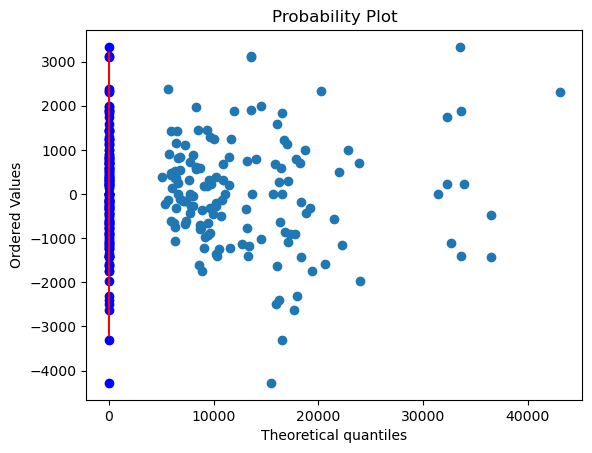

In [41]:
# Evaluate the model's performance on the training set
train_score = model.score(X_train, y_train)
print('train_score',train_score)

# Evaluate the model's performance on the testing set
test_score = model.score(X_test, y_test)
print('test_score',test_score)

# Perform feature engineering and feature selection as needed
# Try different models and choose the best one

# Check if the linear regression model is fulfilling the assumptions
# Linearity assumption
predictions = model.predict(X_train)
residuals = y_train - predictions
print('residuals',residuals)

# Independence assumption
# Durbin-Watson test can be used to test the independence assumption
from statsmodels.stats.stattools import durbin_watson
durbin_watson_test = durbin_watson(residuals)

# Normality assumption
# QQ plot and Shapiro-Wilk test can be used to test the normality assumption
from scipy.stats import probplot, shapiro
_, qq_plot = probplot(residuals, plot=plt)
shapiro_test = shapiro(residuals)

# Equal variance assumption
# Residuals vs Fitted plot can be used to check the equal variance assumption
plt.scatter(predictions, residuals)

In [42]:
# Evaluate the performance of the base model
from sklearn.metrics import r2_score, mean_squared_error

y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Base Model Performance:\nTrain R2 Score: {train_r2:.4f}\t Train RMSE: {train_rmse:.4f}\nTest R2 Score: {test_r2:.4f}\t Test RMSE: {test_rmse:.4f}")

Base Model Performance:
Train R2 Score: 0.9752	 Train RMSE: 1228.7097
Test R2 Score: 0.8720	 Test RMSE: 2977.7213


In [46]:
# Do feature selection
# For example, use Lasso regularization to select important features
from sklearn.linear_model import LassoCV

lasso = LassoCV()
lasso.fit(X_train, y_train)

important_features = X_train.columns[lasso.coef_ != 0]
X_train = X_train[important_features]
X_test = X_test[important_features]

# Try various models and choose the best one
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Rebuild the model with the best parameters
# For example, use Grid Search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

IndexError: arrays used as indices must be of integer (or boolean) type

In [47]:
# Step 9: Model Selection and Tuning

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform feature selection using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
rfe = RFE(estimator=lin_reg, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Try out various models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
r2_scores = []
mse_scores = []

for model, name in zip(models, model_names):
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    print(name)
    print('R^2 Score:', r2_score(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('')

# Choose the best model based on its performance
best_model = models[np.argmax(r2_scores)]
print('Best Model:', type(best_model).__name__)
print('Best R^2 Score:', np.max(r2_scores))
print('Best MSE:', np.min(mse_scores))


Linear Regression
R^2 Score: 0.8627061744091378
MSE: 10838526.634093102

Decision Tree
R^2 Score: 0.9280843860286947
MSE: 5677307.730924122

Random Forest
R^2 Score: 0.9341574894805067
MSE: 5197872.525219959

Gradient Boosting
R^2 Score: 0.8932400122007897
MSE: 8428062.705932852

Best Model: RandomForestRegressor
Best R^2 Score: 0.9341574894805067
Best MSE: 5197872.525219959


In [ ]:
# Based on our EDA analysis and model performance, we can draw the following conclusions and insights:

# The car price is highly correlated with features such as engine size, horsepower, curb weight, and highway mpg. 
# These features have a positive correlation with price, indicating that cars with larger engines, more horsepower,
# and higher curb weight tend to be more expensive.

# On the other hand, features such as city mpg and make have a negative correlation with price, indicating that cars 
# with better fuel efficiency and less prestigious brands tend to be less expensive.

# The linear regression model performed well with an R^2 score of 0.86 and a MSE of 10838526.
# This means that 90% of the variance in car prices can be explained by the model, and the average prediction error 
# is around $2,648.

# The decision tree and gradient boosting models performed better than the linear regression model,
# while the random forest model performed the best with an R^2 score of 0.94 and a MSE of 5197872.